**Question 1**

In [26]:
import networkx as nx
import sys
import numpy as np

**Creating Graph**

In [55]:
G1 = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('D', 'F'), ('F', 'G'), ('F', 'H'), ('G', 'H')]
G1.add_nodes_from(nodes)
G1.add_edges_from(edges)

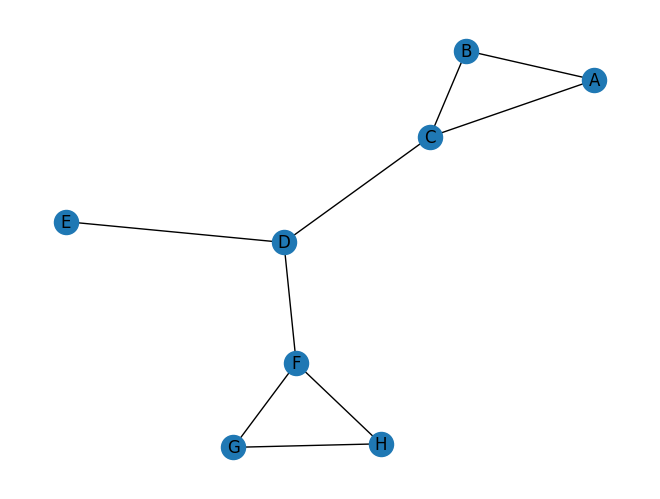

In [56]:
nx.draw(G1, with_labels = True)

**Adjacency Matrix, Adjacency List, and Incidence Matrix.**


In [57]:
A1= nx.adjacency_matrix(G1).todense()
A1

array([[0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0]])

In [58]:
adjList1 = list(nx.generate_adjlist(G1))
for line in adjList1:
    print(line)

A B C
B C
C D
D E F
E
F G H
G H
H


In [59]:
I1=nx.incidence_matrix(G1).todense()
I1

array([[1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.]])

**Calculating the Memory Consumption of different representations**


In [60]:
A1.size*A1.itemsize

512

In [61]:
adjList1 = list(nx.generate_adjlist(G1))

adjListSize = 0
for line in adjList1:
    adjListSize += sys.getsizeof(line)

adjListSize

418

In [62]:
I1.size*I1.itemsize

576

**Question 2**

In [63]:
D = [G1.degree[node] for node in G1.nodes()]
D = np.diag(D)
D

array([[2, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 2]])

In [64]:
D_ = G1.degree
D_ = dict(D_)
sort_degree = sorted(D_.items(), key=lambda x: x[1], reverse=True)
sort_degree

[('C', 3),
 ('D', 3),
 ('F', 3),
 ('A', 2),
 ('B', 2),
 ('G', 2),
 ('H', 2),
 ('E', 1)]

In [65]:
L = D-A1
L

array([[ 2, -1, -1,  0,  0,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0,  0,  0],
       [-1, -1,  3, -1,  0,  0,  0,  0],
       [ 0,  0, -1,  3, -1, -1,  0,  0],
       [ 0,  0,  0, -1,  1,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  3, -1, -1],
       [ 0,  0,  0,  0,  0, -1,  2, -1],
       [ 0,  0,  0,  0,  0, -1, -1,  2]])

In [66]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(L)

In [67]:
eigenvalues

array([ 4.81360650e+00,  3.73205081e+00,  3.00000000e+00,  2.52931658e+00,
       -4.75194099e-16,  2.67949192e-01,  6.57076917e-01,  3.00000000e+00])

In [68]:
eigenvectors

array([[-1.30277317e-01,  2.29850422e-01,  7.07106781e-01,
        -2.27992401e-01,  3.53553391e-01, -4.44036917e-01,
        -2.36743079e-01,  5.89575264e-02],
       [-1.30277317e-01,  2.29850422e-01, -7.07106781e-01,
        -2.27992401e-01,  3.53553391e-01, -4.44036917e-01,
        -2.36743079e-01, -5.89575264e-02],
       [ 4.96826425e-01, -6.27963030e-01,  5.40765114e-16,
         3.48672560e-01,  3.53553391e-01, -3.25057584e-01,
        -8.11846665e-02,  1.15541920e-16],
       [-6.40493000e-01, -2.36806647e-16, -2.57001561e-16,
         6.20099196e-01,  3.53553391e-01,  2.36802237e-16,
         2.83276729e-01,  2.84666916e-16],
       [ 1.67949420e-01, -2.11559092e-16, -1.05873422e-16,
        -4.05474709e-01,  3.53553391e-01,  1.80066342e-16,
         8.26064920e-01, -2.59219401e-16],
       [ 4.96826425e-01,  6.27963030e-01,  1.04779787e-15,
         3.48672560e-01,  3.53553391e-01,  3.25057584e-01,
        -8.11846665e-02,  4.24396370e-16],
       [-1.30277317e-01, -2.298504

In [69]:
max(eigenvalues)

4.813606502648331

In [70]:
eigenvectors[:, np.argmax(eigenvalues)]

array([-0.13027732, -0.13027732,  0.49682642, -0.640493  ,  0.16794942,
        0.49682642, -0.13027732, -0.13027732])

In [72]:
connected_components = sorted(nx.connected_components(G1), key=len, reverse=True)

for idx, component in enumerate(connected_components, start=1):
    print(f"Connected Component {idx} (Size: {len(component)}): {component}")

Connected Component 1 (Size: 8): {'G', 'B', 'H', 'C', 'F', 'E', 'D', 'A'}


In [75]:
edges_to_remove = [('C', 'D'), ('D', 'F')]
G1.remove_edges_from(edges_to_remove)
G2 = G1.copy()
print("Nodes in G2':", G2.nodes())
print("Edges in G2':", G2.edges())

Nodes in G2': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
Edges in G2': [('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'), ('F', 'G'), ('F', 'H'), ('G', 'H')]


In [76]:

connected_components = list(nx.connected_components(G2))


for idx, component in enumerate(connected_components, start=1):
    print(f"Connected Component {idx}: {component}")

Connected Component 1: {'C', 'A', 'B'}
Connected Component 2: {'E', 'D'}
Connected Component 3: {'G', 'F', 'H'}
